In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from pathlib import Path
from tqdm import tqdm

# Step 1: Look at available Chinese dialog corpora

**CallFriend**
- available `/corpora/LDC/LDC96S55`
- `/corpora/LDC/LDC96S55/doc/spkrinfo.doc`

In [17]:
%ls /corpora/LDC/LDC96S55/cf_man_m/evltest/

ma_4972.sph*  ma_5690.sph*  ma_5800.sph*  ma_5824.sph*  ma_5916.sph*
ma_5010.sph*  ma_5773.sph*  ma_5806.sph*  ma_5904.sph*  ma_5930.sph*
ma_5195.sph*  ma_5779.sph*  ma_5812.sph*  ma_5905.sph*  ma_5949.sph*
ma_5530.sph*  ma_5784.sph*  ma_5821.sph*  ma_5906.sph*  ma_5973.sph*


In [2]:
%ls /corpora/LDC/LDC96S55/doc

callinfo.doc*  callinfo.tbl*  cf_man_m.doc*  spkrinfo.doc*  spkrinfo.tbl*


In [26]:
!head -n 20 /corpora/LDC/LDC96S55/doc/spkrinfo.doc

File: spkrinfo.doc
------------------

The file "spkrinfo.tbl" presents all the information available
regarding speaker demographics.  The fields in this table are
described below.  (The "caller" is the person who initiated the call,
and whose voice appears on channel A of the speech files).
Note that there is no information available about the age, education
or geographic origin of the callee (the speaker on channel B).

 Field#	Content
 -------------------
   1	Call-ID (four digits, as they appear in data file names)
   2	Gender of caller (M or F)
   3	Age of caller
   4	Years of education completed by caller
   5	Where the caller grew up (typically a state name)
   6	Area-code plus first three digits of 
	telephone number dialed (last four digits of number are
	encrypted as three letters)


In [2]:
%less /corpora/LDC/LDC96S55/doc/spkrinfo.tbl

In [57]:
%cat /corpora/LDC/LDC96S55/doc/cf_man_m.doc


	-----------------------------------------------------------
	Description of the CallFriend telephone speech  
			  corpus for Mandarin
	-----------------------------------------------------------

	July, 1997

CONTENTS

	1. Summary abstract
	2. Data acquisition
	3. Data verification
	4. Speaker demographics
	5. Dialect Audit

-----------------------------------------------------------------------
1.  Summary abstract

	The CallFriend Mandarin corpus of telephone speech was collected
by the Linguistic Data Consortium primarily in support of the project on 
Language Identification (LID), sponsored by the U.S. Department of Defense.

	This release of the CallFriend Mandarin corpus consists of 60
unscripted telephone conversations between native speakers of Mandarin
for each dialect group.  The recorded conversations last up to 30
minutes. All speakers were aware that they were being recorded. They
were given no guidelines concerning what they should talk about.  Once
a caller was recrui

 **Notes** <br/>
 - Actually just audio files and descriptions
 - But it still has decent demographic information of speakers
 - it looks like [this](https://catalog.ldc.upenn.edu/LDC2018S18) is the version that includes transcripts: LDC2018S18
 

In [38]:
%ls /corpora/LDC/ | grep 'LDC2018' 

LDC2018S05/
LDC2018S06/
LDC2018T24/


It looks like LDC2018S18 corpus is not in UW's directory

In [ ]:
Brandon added it under /corpora/LDC/LDC2018S18

In [4]:
%ls /corpora/LDC/LDC2018S18/data/transcripts/mandarin

ma_4160.txt*  ma_4426.txt*  ma_5520.txt*  ma_5731.txt*  ma_5905.txt*
ma_4198.txt*  ma_4447.txt*  ma_5530.txt*  ma_5773.txt*  ma_5906.txt*
ma_4227.txt*  ma_4559.txt*  ma_5542.txt*  ma_5779.txt*  ma_5930.txt*
ma_4233.txt*  ma_4689.txt*  ma_5560.txt*  ma_5784.txt*  ma_5949.txt*
ma_4249.txt*  ma_4972.txt*  ma_5636.txt*  ma_5800.txt*  ma_5975.txt*
ma_4257.txt*  ma_5010.txt*  ma_5653.txt*  ma_5806.txt*  ma_5982.txt*
ma_4258.txt*  ma_5195.txt*  ma_5690.txt*  ma_5821.txt*
ma_4270.txt*  ma_5260.txt*  ma_5715.txt*  ma_5824.txt*
ma_4389.txt*  ma_5347.txt*  ma_5716.txt*  ma_5904.txt*


In [5]:
!head -n 10 /corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_4160.txt

#Language: man
#File id: ma_4160

1.380 2.000 A: 喂.

1.800 2.720 B: 哎.

2.500 3.910 A: %呃 你 记 一 下.

2.940 4.030 B: 你 等等 啊.


See if you can get any more info on A and B speakers in ma_4160

In [9]:
%ls /corpora/LDC/LDC2018S18/docs

alignment.txt*  callinfo.txt*    headerinfo.txt*  spkrinfo.tbl*
call_ids.lst*   file.tbl         hub5_man.txt*    spkrinfo.txt*
callinfo.tbl*   headerinfo.tbl*  README.txt*      wrd_dvsn.prn*


In [14]:
!cat /corpora/LDC/LDC2018S18/docs/spkrinfo.tbl

ma_4160,M,30,22,Anhui,203778bah
ma_4198,M,39,18,Changsha,312225rjt
ma_4227,F,27,16,Shanghai,216535wnq
ma_4233,M,30,20,Beijing,612645ydc
ma_4249,F,31,15,Shanghai,219459uca
ma_4257,F,26,17,Chongging,313481xal
ma_4258,M,30,15,Beijing,714871fen
ma_4270,M,34,17,Chang_Chun,619538hpk
ma_4389,M,25,17,Beijing,404368hpr
ma_4426,M,31,18,Nanjing,604224wkc
ma_4447,M,29,12,Jinchun,716439snr
ma_4559,M,45,20,Zibe,519747uai
ma_4689,F,20,14,Beijing,215735mct
ma_4972,F,32,16,Zheng_zo,914769nou
ma_5010,F,29,15,Beijing,415856slb
ma_5195,M,25,17,Beijing,205945opb
ma_5260,M,27,17,Kunming,212866keb
ma_5347,M,23,16,Beijing,404873hdk
ma_5520,M,24,18,Beijing,415497xdx
ma_5530,F,33,16,Nanjing,310373igd
ma_5542,F,33,19,Shanghai,416506fpl
ma_5560,M,26,19,Beijing,908777imp
ma_5636,M,25,10,Huhhot,906482apw
ma_5653,M,25,18,Jinan,816461vat
ma_5690,F,28,19,Shijiazhuang,603889wpn
ma_5715,M,36,17,Beijing,718468imu
ma_5716,F,27,20,Beijing,408241ihr
ma_5731,F,36,19,Xian,507281vjc
ma_5773,F,23,,Beijing,603889wpn
ma_5779,F,28

In [4]:
#some interesting variables available in /corpora/LDC/LDC2018S18/docs/callinfo.tbl
!head -n 10 /corpora/LDC/LDC2018S18/docs/callinfo.tbl

ma_4160 audit-done
ma_4160 ntalkers=2 nfemale=1 nmale=1
ma_4160 siA difficulty=1 bgnoise=1 chnoise=1 distortion=1 crosstalk=1
ma_4160 siA ntalkers=1 nfemale=0 nmale=1
ma_4160 siB difficulty=1 bgnoise=3 chnoise=2 distortion=1 crosstalk=1
ma_4160 siB ntalkers=1 nfemale=1 nmale=0
ma_4160 taA sex=M age=adult rate=normal artic=clear acc_pron=1 dial_wds=1 accent=southern-mainland
ma_4160 taB sex=F age=adult rate=normal artic=clear acc_pron=1 dial_wds=1 accent=southern-mainland
ma_4198 audit-done
ma_4198 ntalkers=2 nfemale=0 nmale=2


Given that there is also some detail of the *caller* only in spkrinfo.tbl, I wonder if it would be possible to identify at least the caller in the spkrinfo.tbl file?

In [15]:
!head -n 5 /corpora/LDC/LDC2018S18/docs/spkrinfo.tbl

ma_4160,M,30,22,Anhui,203778bah
ma_4198,M,39,18,Changsha,312225rjt
ma_4227,F,27,16,Shanghai,216535wnq
ma_4233,M,30,20,Beijing,612645ydc
ma_4249,F,31,15,Shanghai,219459uca


In [27]:
with open('/corpora/LDC/LDC2018S18/docs/callinfo.tbl','r') as infile:
    callfriend_raw = infile.read()

'ma_4160 audit-done\nma_4160 ntalkers=2 nfemale=1 nmale=1\nma_4160 siA difficulty=1 bgnoise=1 chnoise=1 distortion=1 crosstalk=1\nma_4160 siA ntalkers=1 nfemale=0 nmale=1\nma_4160 siB difficulty=1 bgnoise=3 chnoise=2 distortion=1 crosstalk=1\nma_4160 siB ntalkers=1 nfemale=1 nmale=0\nma_4160 taA sex=M age=adult rate=normal artic=clear acc_pron=1 dial_wds=1 accent=southern-mainland\nma_4160 taB sex=F age=adult rate=normal artic=clear acc_pron=1 dial_wds=1 accent=southern-mainland\nma_4198 audit-done\nma_4198 ntalkers=2 nfemale=0 nmale=2\nma_4198 siA difficulty=1 bgnoise=1 chnoise=2 distortion=2 crosstalk=1\nma_4198 siA ntalkers=1 nfemale=0 nmale=1\nma_4198 siB difficulty=1 bgnoise=1 chnoise=2 distortion=1 crosstalk=1\nma_4198 siB ntalkers=1 nfemale=0 nmale=1\nma_4198 taA sex=M age=adult rate=normal artic=clear acc_pron=2 dial_wds=1 accent=southern-mainland\nma_4198 taB sex=M age=adult rate=normal artic=mumbled acc_pron=1 dial_wds=1 accent=northern-mainland\nma_4227 audit-done\nma_4227 n

In [31]:
#get counts of ages
all_ages = re.findall('(?<=age=).*?(?=\s)',callfriend_raw)
Counter(all_ages)

Counter({'adult': 101, 'unk': 1, 'juvenile': 3})

In [32]:
#get counts of all sexes
all_sexes = re.findall('(?<=sex=)[M|F]',callfriend_raw)
Counter(all_sexes)

Counter({'M': 48, 'F': 56})

In [16]:
#Find stuff in directories

p = Path('/corpora/LDC/LDC2018S18/data/transcripts/mandarin/')
files = [f for f in p.iterdir() if f.is_file()]


In [20]:
ni_count = 0
nin_count = 0

for i in tqdm(range(0,len(files))):
    with open(str(files[i].absolute()),'r') as infile:
        raw = infile.read()
        
        ni_count += len(re.findall('你',raw))
        nin_count += len(re.findall('您',raw))
        
        if bool(re.findall('您',raw)):
            print(str(files[i].absolute()))

100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 1954.91it/s]

/corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_4972.txt
/corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_5560.txt
/corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_5653.txt
/corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_5821.txt
/corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_5930.txt
/corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_5975.txt


In [19]:
print(f'{round(100*(nin_count/(nin_count+ni_count)),2)}% of "you"s are 您')
print(f'{nin_count} instances out of {nin_count+ni_count}')

0.13% of "you"s are 您
9 instances out of 7152


In [25]:
%less /corpora/LDC/LDC2018S18/data/transcripts/mandarin/ma_5930.txt

### Explore relations between CallFriend speakers

Question: how can I link the call ids to the speaker ids?

In [6]:
!head -n 5 /corpora/LDC/LDC96S55/doc/callinfo.tbl

ma_4160 PIN=045396|GENDER=both|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|
ma_4198 PIN=870005|GENDER=male|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|
ma_4227 PIN=646717|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|
ma_4233 PIN=719277|GENDER=both|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|
ma_4249 PIN=125128|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|


In [1]:
!head -n 20  /corpora/LDC/LDC96S55/doc/spkrinfo.tbl

ma_0636,,,,,512482kaw
ma_0664,,,,,515296una
ma_0928,,,,,304292hgo
ma_0941,,,,,402477bhl
ma_0964,,,,,801371tdq
ma_0966,,,,,803356wgm
ma_1017,,,,,718353dhs
ma_1034,,,,,317743yha
ma_1191,,,,,503635dlf
ma_1253,,,,,818457tjx
ma_1306,,,,,718852wbi
ma_4160,M,30,22,Anhui,203778bah
ma_4198,M,39,18,Changsha,312225rjt
ma_4227,f,27,16,Shanghai,216535wnq
ma_4233,M,30,20,Beijing,612645ydc
ma_4249,F,31,15,Shanghai,219459uca
ma_4257,F,26,17,Chongging,313481xal
ma_4270,M,34,17,Chang_Chun,619538hpk
ma_4281,F,31,21,Tongnan,609683kby
ma_4336,F,25,14,Canton,508229ioh


 For example: <br/> 
 ma_4160,M,30,22,Anhui,203778bah means: <br/>
- Call-ID = ma_4160
- Gender of caller = Male
- Age of caller = 30
- Years of education completed by caller = 22
- Where the caller grew up (typically a state name) = Anhui
- Area-code plus first three digits of telephone number dialed (last four digits of number are encrypted as three letters) = 203778bah <br/> <br/>
Note that there seem to be plenty of missing values

In [18]:
%ls /corpora/LDC/LDC96S55/cf_man_m/devtest/

ma_0664.sph*  ma_1191.sph*  ma_4426.sph*  ma_5347.sph*  ma_5715.sph*
ma_0966.sph*  ma_4270.sph*  ma_4447.sph*  ma_5520.sph*  ma_5716.sph*
ma_1017.sph*  ma_4281.sph*  ma_4559.sph*  ma_5636.sph*  ma_5731.sph*
ma_1034.sph*  ma_4336.sph*  ma_4689.sph*  ma_5653.sph*  ma_5750.sph*


In [21]:
!head -n 10 /corpora/LDC/LDC96S55/cf_man_m/devtest/ma_4559.sph

NIST_1A
   1024
sample_count -i 14400000
channel_count -i 2
sample_coding -s4 ulaw
sample_n_bytes -i 1
sample_rate -i 8000
database_id -s10 CALLFRIEND
pin -s6 319320
end_head


In [2]:
%less /corpora/LDC/LDC96S55/doc/cf_man_m.doc

In [29]:
with open('/corpora/LDC/LDC96S55/doc/callinfo.tbl','r') as infile:
    raw= infile.read().split('\n')

['ma_4160 PIN=045396|GENDER=both|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4198 PIN=870005|GENDER=male|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4227 PIN=646717|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4233 PIN=719277|GENDER=both|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4249 PIN=125128|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4257 PIN=743566|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4270 PIN=564875|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4276 PIN=056733|GENDER=male|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4281 PIN=516479|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4336 PIN=637682|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4389 PIN=257509|GENDER=both|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|',
 'ma_4426 PIN=776661|GENDER=female|NUMSPEAKER=2|QUALITY=good|SCO

In [41]:
import re
call_ids = [re.findall('ma_[0-9]*',item)[0] for item in raw if len(item)>0]
call_ids = sorted(call_ids)
len(call_ids)

['ma_4160',
 'ma_4198',
 'ma_4227',
 'ma_4233',
 'ma_4249',
 'ma_4257',
 'ma_4270',
 'ma_4276',
 'ma_4281',
 'ma_4336',
 'ma_4389',
 'ma_4426',
 'ma_4447',
 'ma_4559',
 'ma_4689',
 'ma_4970',
 'ma_4972',
 'ma_5010',
 'ma_5195',
 'ma_5260',
 'ma_5347',
 'ma_5520',
 'ma_5530',
 'ma_5542',
 'ma_5560',
 'ma_5636',
 'ma_5653',
 'ma_5673',
 'ma_5690',
 'ma_5715',
 'ma_5716',
 'ma_5731',
 'ma_5750',
 'ma_5773',
 'ma_5779',
 'ma_5784',
 'ma_5800',
 'ma_5806',
 'ma_5812',
 'ma_5817',
 'ma_5821',
 'ma_5824',
 'ma_5904',
 'ma_5905',
 'ma_5906',
 'ma_5916',
 'ma_5930',
 'ma_5949',
 'ma_5973',
 'ma_5975',
 'ma_5982']

In [42]:
call_ids[0:5]

['ma_4160', 'ma_4198', 'ma_4227', 'ma_4233', 'ma_4249']

In [43]:
with open('/corpora/LDC/LDC96S55/doc/spkrinfo.tbl','r') as infile:
    raw= infile.read().split('\n')
speaker_ids = [re.findall('ma_[0-9]*',item)[0] for item in raw if len(item)>0]
speaker_ids = sorted(speaker_ids)
len(speaker_ids)

60

In [46]:
len(set(speaker_ids).intersection(set(call_ids)))

49

Actually the speaker ids and call ids are overlapping... how does that work? maybe the first id of the call table is actually speaker ids and the PINs are the call ids? That would imply duplicate PIN ids with 2 different ma_ numbers

In [47]:
with open('/corpora/LDC/LDC96S55/doc/callinfo.tbl','r') as infile:
    raw= infile.read().split('\n')


In [48]:
test = raw[0]
test

'ma_4160 PIN=045396|GENDER=both|NUMSPEAKER=2|QUALITY=good|SCOMM=none|DCOMM=none|'

In [50]:
PINs = [re.findall('(?<=PIN=)[0-9]*(?=|)',item)[0] for item in raw if len(item)>0]
len(PINs)

51

In [58]:
len(set(PINs))

51

There are no duplicated PIN numbers either. My guess is that only demographics of the caller are recorded, and not the recipient. 

Trying **2005 NIST Speaker Recognition Evaluation Training Data** <br/>
- `/corpora/LDC/LDC11S01`

In [30]:
%ls /corpora/LDC/LDC11S01/nist_2005_sre_tr_d1

data/  doc/  index.html*


In [32]:
!head -n 5 /corpora/LDC/LDC11S01/nist_2005_sre_tr_d1/index.html

<html>
	<head>
		<title>NIST 2005 Speaker Recognition Evaluation Training Data</title>
		<meta name="description"
			content="Documentation for NIST 2005 Speaker Recognition Evaluation Training Data">


In [37]:
%ls /corpora/LDC/LDC11S01/nist_2005_sre_tr_d1/data/

asr_tran/  female/  male/  speech/


In [39]:
!head -n 5 /corpora/LDC/LDC11S01/nist_2005_sre_tr_d1/data/asr_tran/jaab.ctm

jaab 1 0.05 0.19 THEY
jaab 1 0.24 0.15 ONLY
jaab 1 0.39 0.21 HAVE
jaab 1 0.60 0.16 TWO
jaab 1 0.76 0.80 PARTIES


In [28]:
%less /corpora/LDC/LDC11S01/nist_2005_sre_tr_d1/doc/file.tbl

.
./doc
./index.html
./data
./data/asr_tran
./data/male
./data/female
./data/speech
./data/speech/jchh.sph
./data/speech/jcho.sph
./data/speech/jchv.sph
./data/speech/jcic.sph
./data/speech/jcij.sph
./data/speech/jciq.sph
./data/speech/jcix.sph
./data/speech/jcje.sph
./data/speech/jcjl.sph
./data/speech/jaht.sph
./data/speech/jbqq.sph
./data/speech/jcdo.sph
./data/speech/jcdv.sph
./data/speech/jcec.sph
./data/speech/jcej.sph
./data/speech/jceq.sph
./data/speech/jcex.sph
./data/speech/jcfe.sph
./data/speech/jcfl.sph
./data/speech/jcfs.sph
./data/speech/jcfz.sph
./data/speech/jcgg.sph
./data/speech/jcgn.sph
./data/speech/jcgu.sph
./data/speech/jchb.sph
./data/speech/jchi.sph
./data/speech/jchp.sph
./data/speech/jchw.sph
./data/speech/jcid.sph
./data/speech/jcik.sph
./data/speech/jcir.sph
./data/speech/jciy.sph
./data/speech/jcjf.sph
./data/speech/jcjm.sph
./data/speech/jahu.sph
./data/speech/jaib.sph
./data/speech/jaii.sph
./data/speech/jaip.sph
./data/speech/jaiw.sph
./data/speech/jajd.

Trying **MAGICDATA Mandarin Chinese Conversational Speech Corpus: MDT2021S003** <br/>
- https://www.openslr.org/123/

In [2]:
%ls MDT2021S003/

README.txt  SPKINFO.txt  TXT/  UTTERANCEINFO.txt  WAV/


In [9]:
!head -n 5 MDT2021S003/SPKINFO.txt

In [1]:
import pandas as pd
with open('MDT2021S003/SPKINFO.txt','r') as infile:
    df = pd.read_table(infile)
df.head(5)

,CHANNEL,SPEAKER_ID,GENDER,AGE,"REGION,CITY",DEVICE
0,C0,G00000016,M,Middle-aged and young people,Sichuan,Mobile phone
1,C0,G00000022,M,Middle-aged and young people,Sichuan,Mobile phone
2,C0,G00000033,M,Middle-aged and young people,Sichuan,Mobile phone
3,C0,G00000058,M,Middle-aged and young people,Sichuan,Mobile phone
4,C0,G00000076,F,Middle-aged and young people,Sichuan,Mobile phone


In [20]:
from collections import Counter
Counter(df.AGE)

Counter({'Middle-aged and young people': 663})

In [22]:
Counter(df.GENDER)

Counter({'M': 368, 'F': 295})

Problem with this data: very little demographic information available for speakers.

Trying **HKUST/MTS: A Very Large Scale Mandarin
Telephone Speech Corpus** <br/>
- https://www.researchgate.net/profile/David-Graff-5/publication/220758477_HKUSTMTS_A_very_large_scale_Mandarin_telephone_speech_corpus/links/004635346a94cf2642000000/HKUST-MTS-A-very-large-scale-Mandarin-telephone-speech-corpus.pdf
- LDC2005T32
- Not downloaded on Patas, but says it's installed [here](https://cldb.ling.washington.edu/live/livesearch-corpus-form.php)

In [25]:
%ls /corpora/LDC/ | grep 'LDC200' 

LDC2004S13/
LDC2005S13/
LDC2006S14/
LDC2009S04/
LDC2009S05/
LDC2009T04/


According to Brandon, this is under `/corpora/LDC/LDC05T32`

In [2]:
%ls /corpora/LDC/LDC05T32/docs

calldata-dev.txt*    file.tbl*    topic-list.txt*
calldata-train.txt*  README.txt*  trans-guidelines.pdf*


In [4]:
!head -n 5 /corpora/LDC/LDC05T32/docs/calldata-train.txt

Filename	Age A	Gender A	Birth place A	Phone A	Accent A	Age B	Gender B	Birth place B	Phone B	Accent B	Topic ID
20040527_210939_A901153_B901154	23	Male	Mandarin	Fixed	Standard	23	Male	Mandarin	Fixed	Standard	34
20040602_212336_A001169_B001170	21	Male	Mandarin	Fixed	Standard	20	Male	Mandarin	Fixed	Standard	39
20040602_212446_A001302_B001301	23	Male	Mandarin	Fixed	Standard	22	Male	Mandarin	Fixed	Standard	27
20040602_212534_A001178_B001179	20	Male	Mandarin	Fixed	Accented	20	Male	Mandarin	Fixed	Standard	36


In [107]:
%less /corpora/LDC/LDC05T32/docs/file.tbl

Interesting **notes** from readme: <br/>
- Most subjects did not previously know each other.
- Topics were proposed to subjects
- Subjects were asked to provide several pieces of demographic
information, including gender, age, native language/dialect,
birthplace, education, occupation, phone type, etc.

In [14]:
%ls /corpora/LDC/LDC05T32/data/trans/train

20040527_210939_A901153_B901154.txt*  20040826_201623_A011433_B011434.txt*
20040602_212336_A001169_B001170.txt*  20040826_203934_A011435_B011436.txt*
20040602_212446_A001302_B001301.txt*  20040826_204913_A011437_B011438.txt*
20040602_212534_A001178_B001179.txt*  20040826_211730_A011439_B011440.txt*
20040602_214251_A001160_B001159.txt*  20040826_220427_A011443_B011444.txt*
20040602_215850_A001305_B001306.txt*  20040827_152053_A011452_B011453.txt*
20040615_112413_A001433_B001432.txt*  20040827_153949_A011455_B011454.txt*
20040615_112720_A001435_B001434.txt*  20040827_203033_A011456_B011457.txt*
20040615_133201_A003002_B003001.txt*  20040827_205633_A011460_B011461.txt*
20040615_152812_A001463_B001464.txt*  20040827_211826_A011462_B011463.txt*
20040615_153352_A001460_B001461.txt*  20040827_212717_A011464_B011465.txt*
20040615_154204_A001457_B001456.txt*  20040827_213801_A011466_B011467.txt*
20040615_154238_A001458_B001459.txt*  20040827_224030_A011470_B011471.txt*
20040615_165703_A003006_B

Do some exploratory statistics on the demographics of training data

In [2]:

with open('/corpora/LDC/LDC05T32/docs/calldata-train.txt','r') as infile:
    demographics = pd.read_table(infile)

In [16]:
demographics.head(5)

,Filename,Age A,Gender A,Birth place A,Phone A,Accent A,Age B,Gender B,Birth place B,Phone B,Accent B,Topic ID
0,20040527_210939_A901153_B901154,23,Male,Mandarin,Fixed,Standard,23,Male,Mandarin,Fixed,Standard,34
1,20040602_212336_A001169_B001170,21,Male,Mandarin,Fixed,Standard,20,Male,Mandarin,Fixed,Standard,39
2,20040602_212446_A001302_B001301,23,Male,Mandarin,Fixed,Standard,22,Male,Mandarin,Fixed,Standard,27
3,20040602_212534_A001178_B001179,20,Male,Mandarin,Fixed,Accented,20,Male,Mandarin,Fixed,Standard,36
4,20040602_214251_A001160_B001159,21,Male,Mandarin,Fixed,Standard,21,Male,Mandarin,Fixed,Standard,38


In [3]:
#rename all columns to have underscores instead of spaces
original_cols = list(demographics.columns)
new_cols = [re.sub(' ','_',item) if ' ' in item else item for item in list(demographics.columns)]

change_cols = dict()
for i in range(0,len(original_cols)):
    change_cols[original_cols[i]] = new_cols[i]
demographics = demographics.rename(columns=change_cols)
demographics.columns

Index(['Filename', 'Age_A', 'Gender_A', 'Birth_place_A', 'Phone_A', 'Accent_A',
       'Age_B', 'Gender_B', 'Birth_place_B', 'Phone_B', 'Accent_B',
       'Topic_ID'],
      dtype='object')

In [4]:
#Get a histogram of ages of callers in buckets of decades
all_ages = list(demographics.Age_A)+list(demographics.Age_B)
sorted(Counter(all_ages).items())


[(17, 2),
 (18, 6),
 (19, 14),
 (20, 104),
 (21, 73),
 (22, 78),
 (23, 89),
 (24, 116),
 (25, 119),
 (26, 137),
 (27, 110),
 (28, 176),
 (29, 102),
 (30, 230),
 (31, 92),
 (32, 103),
 (33, 56),
 (34, 31),
 (35, 40),
 (36, 14),
 (37, 6),
 (38, 12),
 (39, 4),
 (40, 10),
 (41, 4),
 (42, 3),
 (43, 1),
 (45, 1),
 (46, 4),
 (48, 2),
 (50, 2),
 (51, 1),
 (55, 2),
 (58, 2)]

In [60]:
print(max(Counter(all_ages).keys()))
print(min(Counter(all_ages).keys()))

58
17


In [5]:
def get_decade(a)->str:
    output = ''
    if a< 10:
        output += '0s'
    elif a <20:
        output += '10s'
    elif a <30:
        output += '20s'
    elif a <40:
        output += '30s'
    elif a <50:
        output += '40s'
    elif a <60:
        output += '50s'
    elif a <70:
        output += '60s'  
    return output

In [6]:
demographics['decade_A'] = demographics.Age_A.apply(get_decade)
demographics['decade_B'] = demographics.Age_B.apply(get_decade)

In [66]:
demographics.head(5)

,Filename,Age_A,Gender_A,Birth_place_A,Phone_A,Accent_A,Age_B,Gender_B,Birth_place_B,Phone_B,Accent_B,Topic_ID,decade_A,decade_B
0,20040527_210939_A901153_B901154,23,Male,Mandarin,Fixed,Standard,23,Male,Mandarin,Fixed,Standard,34,20s,20s
1,20040602_212336_A001169_B001170,21,Male,Mandarin,Fixed,Standard,20,Male,Mandarin,Fixed,Standard,39,20s,20s
2,20040602_212446_A001302_B001301,23,Male,Mandarin,Fixed,Standard,22,Male,Mandarin,Fixed,Standard,27,20s,20s
3,20040602_212534_A001178_B001179,20,Male,Mandarin,Fixed,Accented,20,Male,Mandarin,Fixed,Standard,36,20s,20s
4,20040602_214251_A001160_B001159,21,Male,Mandarin,Fixed,Standard,21,Male,Mandarin,Fixed,Standard,38,20s,20s


Text(0.5, 0.98, 'Distribution of ages of caller participants')

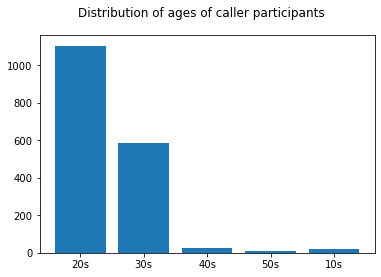

In [7]:
#graph a sorted histogram of decades
all_decades = list(demographics.decade_A)+list(demographics.decade_B)

plt.bar(Counter(all_decades).keys(),Counter(all_decades).values())
plt.suptitle("Distribution of ages of caller participants")

In [8]:
#graph sorted pairs of participants to conversations

age_of_call = []
for i in range(0,len(demographics)):
    
    a = demographics.decade_A.iloc[i]
    b = demographics.decade_B.iloc[i]
    
    pair = sorted([a,b])
    age_of_call.append(pair[0]+' and '+pair[1])


In [9]:
age_pairs = Counter(age_of_call).most_common()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

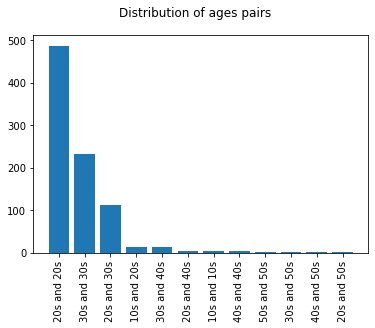

In [10]:
plt.bar([item[0] for item in age_pairs],[item[1] for item in age_pairs])
plt.suptitle("Distribution of ages pairs")
plt.xticks(rotation=90)

**notes**
- most calls are among people in their 20s
- most calls are between people both of whom are in their 20s

In [11]:
#Get distributions of topics discussed
with open('/corpora/LDC/LDC05T32/docs/topic-list.txt','r') as infile:
    topics_raw = infile.read()

In [90]:
%less /corpora/LDC/LDC05T32/docs/topic-list.txt

In [12]:
raw_list = re.findall('[0-9]{1,2}\..*(?=\n)',topics_raw)
topic_dict = Counter()
for row in raw_list:
    topic_key = int(re.findall('[0-9]*(?=\.)',row)[0])
    topic = re.findall('(?<=[0-9]\. ).*',row)[0]
    topic_dict[topic_key]=topic
    
topic_dict

Counter({1: 'Professional Sports on TV.',
         2: 'Life Partners.',
         3: 'Comedy.',
         4: 'Hypothetical Situations. One Million Dollars to leave China.',
         5: 'Hypothetical Situations. Opening your own business',
         6: 'Hypothetical Situations. Time Travel.',
         7: 'Hypothetical Situations. An Anonymous Benefactor',
         8: 'Movies.',
         9: 'Computer games.',
         10: 'Current Events.',
         11: 'Hobbies.',
         12: 'Smoking. ',
         13: 'Terrorism.',
         14: 'Family Values.',
         15: 'Health and Fitness.',
         16: 'Education.',
         17: 'Family.',
         18: 'Outdoor Activities.',
         19: 'Friends.',
         20: 'Food.',
         21: 'Illness (SARS).',
         22: 'Personal Habits.',
         23: 'Arms Inspections in Iraq.',
         24: 'Holidays.',
         25: 'Politics',
         26: 'Music. ',
         27: 'Cell phones. ',
         28: 'Travel.',
         29: 'Technical devices.',
         3

In [117]:
def index_to_topic(a:int) -> str:
    
    return(topic_dict[a])


In [119]:
demographics['Topic_Name'] = demographics.Topic_ID.apply(index_to_topic)

In [121]:
Counter(demographics.Topic_Name).most_common()

[('Hobbies.', 153),
 ('Universities', 69),
 ('Friends.', 64),
 ('Computer games.', 61),
 ('Food.', 51),
 ('Travel.', 48),
 ('Life Partners.', 39),
 ('Movies.', 35),
 ('Olympic Games.', 34),
 ('Football (Soccer).', 33),
 ('Music. ', 33),
 ('History.', 27),
 ('Health and Fitness.', 22),
 ('Personal Habits.', 22),
 ('Holidays.', 20),
 ('Hypothetical Situations. Opening your own business', 16),
 ('Hypothetical Situations. One Million Dollars to leave China.', 16),
 ('Geography.', 15),
 ('Family.', 14),
 ('Corruption.', 13),
 ('Smoking. ', 13),
 ('Education.', 13),
 ('Current Events.', 12),
 ('Hypothetical Situations. An Anonymous Benefactor', 8),
 ('Outdoor Activities.', 8),
 ('Cell phones. ', 6),
 ('Art.', 6),
 ('Economic Reform ', 5),
 ('Professional Sports on TV.', 5),
 ('Politics', 4),
 ('Technical devices.', 3),
 ('Hypothetical Situations. Time Travel.', 2),
 ('Crime', 2),
 ('Illness (SARS).', 1)]

In [ ]:
#get a simple distribution of 你 and 您 across training data

In [43]:
%ls /corpora/LDC/LDC05T32/data/trans/train/

20040527_210939_A901153_B901154.txt*  20040826_201623_A011433_B011434.txt*
20040602_212336_A001169_B001170.txt*  20040826_203934_A011435_B011436.txt*
20040602_212446_A001302_B001301.txt*  20040826_204913_A011437_B011438.txt*
20040602_212534_A001178_B001179.txt*  20040826_211730_A011439_B011440.txt*
20040602_214251_A001160_B001159.txt*  20040826_220427_A011443_B011444.txt*
20040602_215850_A001305_B001306.txt*  20040827_152053_A011452_B011453.txt*
20040615_112413_A001433_B001432.txt*  20040827_153949_A011455_B011454.txt*
20040615_112720_A001435_B001434.txt*  20040827_203033_A011456_B011457.txt*
20040615_133201_A003002_B003001.txt*  20040827_205633_A011460_B011461.txt*
20040615_152812_A001463_B001464.txt*  20040827_211826_A011462_B011463.txt*
20040615_153352_A001460_B001461.txt*  20040827_212717_A011464_B011465.txt*
20040615_154204_A001457_B001456.txt*  20040827_213801_A011466_B011467.txt*
20040615_154238_A001458_B001459.txt*  20040827_224030_A011470_B011471.txt*
20040615_165703_A003006_B

In [45]:
!head -n 5 /corpora/LDC/LDC05T32/data/trans/train/20040527_210939_A901153_B901154.txt

# 20040527_210939_A901153_B901154

0.000000 4.070000 B: ι���, ��������˵����

2.800750 6.403750 A: ι, ���, ������


In [37]:
!file /corpora/LDC/LDC05T32/data/trans/train/20040527_210939_A901153_B901154.txt

/corpora/LDC/LDC05T32/data/trans/train/20040527_210939_A901153_B901154.txt: ISO-8859 text


Important lesson learned from [this thread](https://stackoverflow.com/questions/23731176/how-to-print-chinese-characters-stored-in-a-file-with-charset-iso-8859-1-in-py): "file is probably wrong, since it only 'guesses' the encoding. Using gb18030 as the encoding gives the correct result"

In [21]:
with open('/corpora/LDC/LDC05T32/data/trans/train/20040527_210939_A901153_B901154.txt','r',encoding='iso-8859-1') as infile:
    raw = infile.read()

b'# 20040527_210939_A901153_B901154\n\n0.000000 4.070000 B: \xce\xb9, \xcb\xb5\n\n2.800750 6.403750 A:'

In [46]:
with open('/corpora/LDC/LDC05T32/data/trans/train/20040527_210939_A901153_B901154.txt','r',encoding='gb18030') as infile:
    raw = infile.read()

In [51]:
#Find stuff in directories

p = Path('/corpora/LDC/LDC05T32/data/trans/train/')
files = [f for f in p.iterdir() if f.is_file()]


'/corpora/LDC/LDC05T32/data/trans/train/20040616_105632_A003047_B003046.txt'

In [56]:
ni_count = 0
nin_count = 0

for i in tqdm(range(0,len(files))):
    with open(str(files[i].absolute()),'r',encoding='gb18030') as infile:
        raw = infile.read()
        
        ni_count += len(re.findall('你',raw))
        nin_count += len(re.findall('您',raw))
        

100%|███████████████████████████████████████| 873/873 [00:00<00:00, 1040.86it/s]


In [68]:
print(f'{round(100*(nin_count/(nin_count+ni_count)),2)}% of "you"s are 您')
print(f'{nin_count} instances out of {nin_count+ni_count}')

0.45% of "you"s are 您
201 instances out of 44861


Trying **CallHome**
- /corpora/LDC/LDC96S34 

In [23]:
%ls /corpora/LDC/LDC96S34

0readme.1st  callhome/  shorten/  sphere/


In [24]:
!less /corpora/LDC/LDC96S34/0readme.1st

7=
This is the CD-ROM release of the Callhome Mandarin Speech Corpus,
produced by the Linguistic Data Consortium.  This release contains
speech data files ONLY, along with the minimal amount of documentation
needed to describe the contents and format of the speech files, and
the software packages needed to uncompress the speech data.

Other components of the Callhome Mandarin Corpus include transcriptions
of the speech, full documentation on the transcription conventions and
format, and complete auditing information on the speakers represented
in the transcripts (including gender, channel quality, and so on).
These text components of the corpus are obtainable from the LDC via
the internet (i.e. using an FTP or World Wide Web connection to the
LDC's ftp/www server).

Shipment of this CD-ROM corpus has been accompanied by E-mail
notification from the LDC to the original recipient of the CD-ROM set,
describing how to obtain the associated text components by electronic
transfer.  As modi

In [25]:
%ls /corpora/LDC/LDC96T16

ls: cannot access '/corpora/LDC/LDC96T16': No such file or directory
